

<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;"><b>Binary Classification with a Bank Churn Dataset V1</b></h2>
    <hr style="border-top: 2px solid #264653;">
    <h3 style="font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri 😊🌟</strong></h3>
    <h2></h2>
</div>

<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻Outline🔻
</p>


<div style = "border-left:  5px solid #1b4332; padding: 12px"><ul>
    <li><strong>1 - Explore the Dataset</li>
    <li><strong>2 - Preprocess the Data</li>
    <li><strong>3 - Model Selection and Training</li>
    <li><strong>4 - Model Optimization</li>
    <li><strong>5 - Model Evaluation</li>
    <li><strong>6 - Submission Preparation</li>
    <li><strong>7 - Final Submission and Post-Competition Analysis</li></ul></div>

<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻1 - Explore the Dataset🔻
</p>


### To effectively analyze and prepare the data, I will combine the two datasets: the first generated by deep learning provided through this competition, and the second is the original dataset. 

## let's started 😊🌟

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Importing libraries⬇️</p>

In [46]:
#Basic liberaries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#imputaion for replacing the missing calues with values of our choice like mean median etc..
from sklearn.impute import SimpleImputer

#for the one hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Standardization
from sklearn.preprocessing import StandardScaler

#data spliting 
from sklearn.model_selection import train_test_split

#Remove Features with Low Variance
from sklearn.feature_selection import VarianceThreshold

#Training models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Cross-Validation
from sklearn.model_selection import cross_val_score

#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#to ignore the marnings
import warnings
warnings.filterwarnings('ignore')

#to display all columns
pd.set_option('display.max_columns',None)
print("setep completed")

setep completed


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Load Dataset⬇️</p>

In [47]:

df = pd.read_csv('../Data/train.csv')
original_df = pd.read_csv('../Data/Churn_Modelling.csv')
test_df = pd.read_csv('../Data/test.csv')

In [48]:
#let's view if the columns in the original dataset is the same as our df

print(f"columns of our df are : \n{list(df.columns)}")
print(f"columns of the original df are : \n{list(original_df.columns)}")

columns of our df are : 
['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
columns of the original df are : 
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [49]:
# first we will drop the two columns id and RowNumber

df = df.drop(['id'],axis = 1)
original_df = original_df.drop(['RowNumber'],axis = 1)

In [50]:
#now we can join the two dataset together 

BChurn = pd.concat([df,original_df],ignore_index=True)

In [51]:
BChurn.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [52]:
#also we can drop the CusromerId ane Surname columns because he don't have any impact on the target
BChurn=BChurn.drop(['CustomerId','Surname'],axis=1)

## our dataset containe :
| Column Name      | Description |
|------------------|-------------|
| Surname          | Customer's surname (not typically useful for prediction). |
| CreditScore      | Customer's credit score. |
| Geography        | Customer's country of residence. |
| Gender           | Customer's gender. |
| Age              | Customer's age. |
| Tenure           | Number of years the customer has been with the bank. |
| Balance          | Customer's bank balance. |
| NumOfProducts    | Number of products the customer has with the bank. |
| HasCrCard        | Indicates whether the customer has a credit card (1) or not (0). |
| IsActiveMember   | Indicates whether the customer is an active member (1) or not (0). |
| EstimatedSalary  | Customer's estimated salary. |
| Exited           | Whether the customer has Exited   (1) or not (0) - the target variable. |


In [53]:
BChurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [54]:
BChurn["Exited"].value_counts()

Exited
0    138077
1     36959
Name: count, dtype: int64

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Statistical Summary⬇️</p>

#### All the things that we will discover in this section will be addressed in the previous sections.

In [55]:
df.shape

(165034, 13)

## the dataset contain:
- 165034 rows
- 13 columns

In [56]:
BChurn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,175036.000000,175035.000000,175036.000000,175036.000000,175036.000000,175035.000000,175035.000000,175036.000000,175036.000000
mean,656.117273,38.171393,5.019904,56678.824183,1.553069,0.751187,0.498752,111861.027293,0.211151
std,81.151830,8.969523,2.811125,62982.466070,0.549210,0.432327,0.500000,50815.418008,0.408126
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73181.390000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000
75%,710.000000,42.000000,7.000000,120729.770000,2.000000,1.000000,1.000000,154767.340000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### **from the table above we can conclude that this dataset nead to scaling because of the wide range and the hight standard deviation in a lot of feature like `Balance` and `EstimatedSalary` features.**

In [57]:
BChurn.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

#### congratulations, we don't have a lot of messing value.

***the columns that have 1 missing value are:***
- Geography
- Age
- HasCrCard
- IsActiveMember

In [58]:
BChurn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

#### our data is quite beautiful; it has a few categorical features, but the majority of featurs are numerical.

In [59]:
#let's divide our features into two list one categorical and the seconde numerical

categorical_features=[c for c in BChurn.columns if BChurn[c].dtype == 'object']
numerical_features=[c for c in BChurn.columns if c not in categorical_features]
numerical_features.remove('Exited')

In [60]:
numerical_features,"categorical features:",categorical_features

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 'categorical features:',
 ['Geography', 'Gender'])

<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻Data preprocessing🔻
</p>


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Handling Missing Values⬇️</p>

In [61]:
test_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [62]:
Inf=SimpleImputer(strategy='mean')
Icf=SimpleImputer(strategy='most_frequent')
BChurn[numerical_features] = pd.DataFrame(Inf.fit_transform(BChurn[numerical_features]))
BChurn[categorical_features] =pd.DataFrame(Icf.fit_transform(BChurn[categorical_features])) #mode

In [63]:
BChurn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Outlier Analysis⬇️</p>

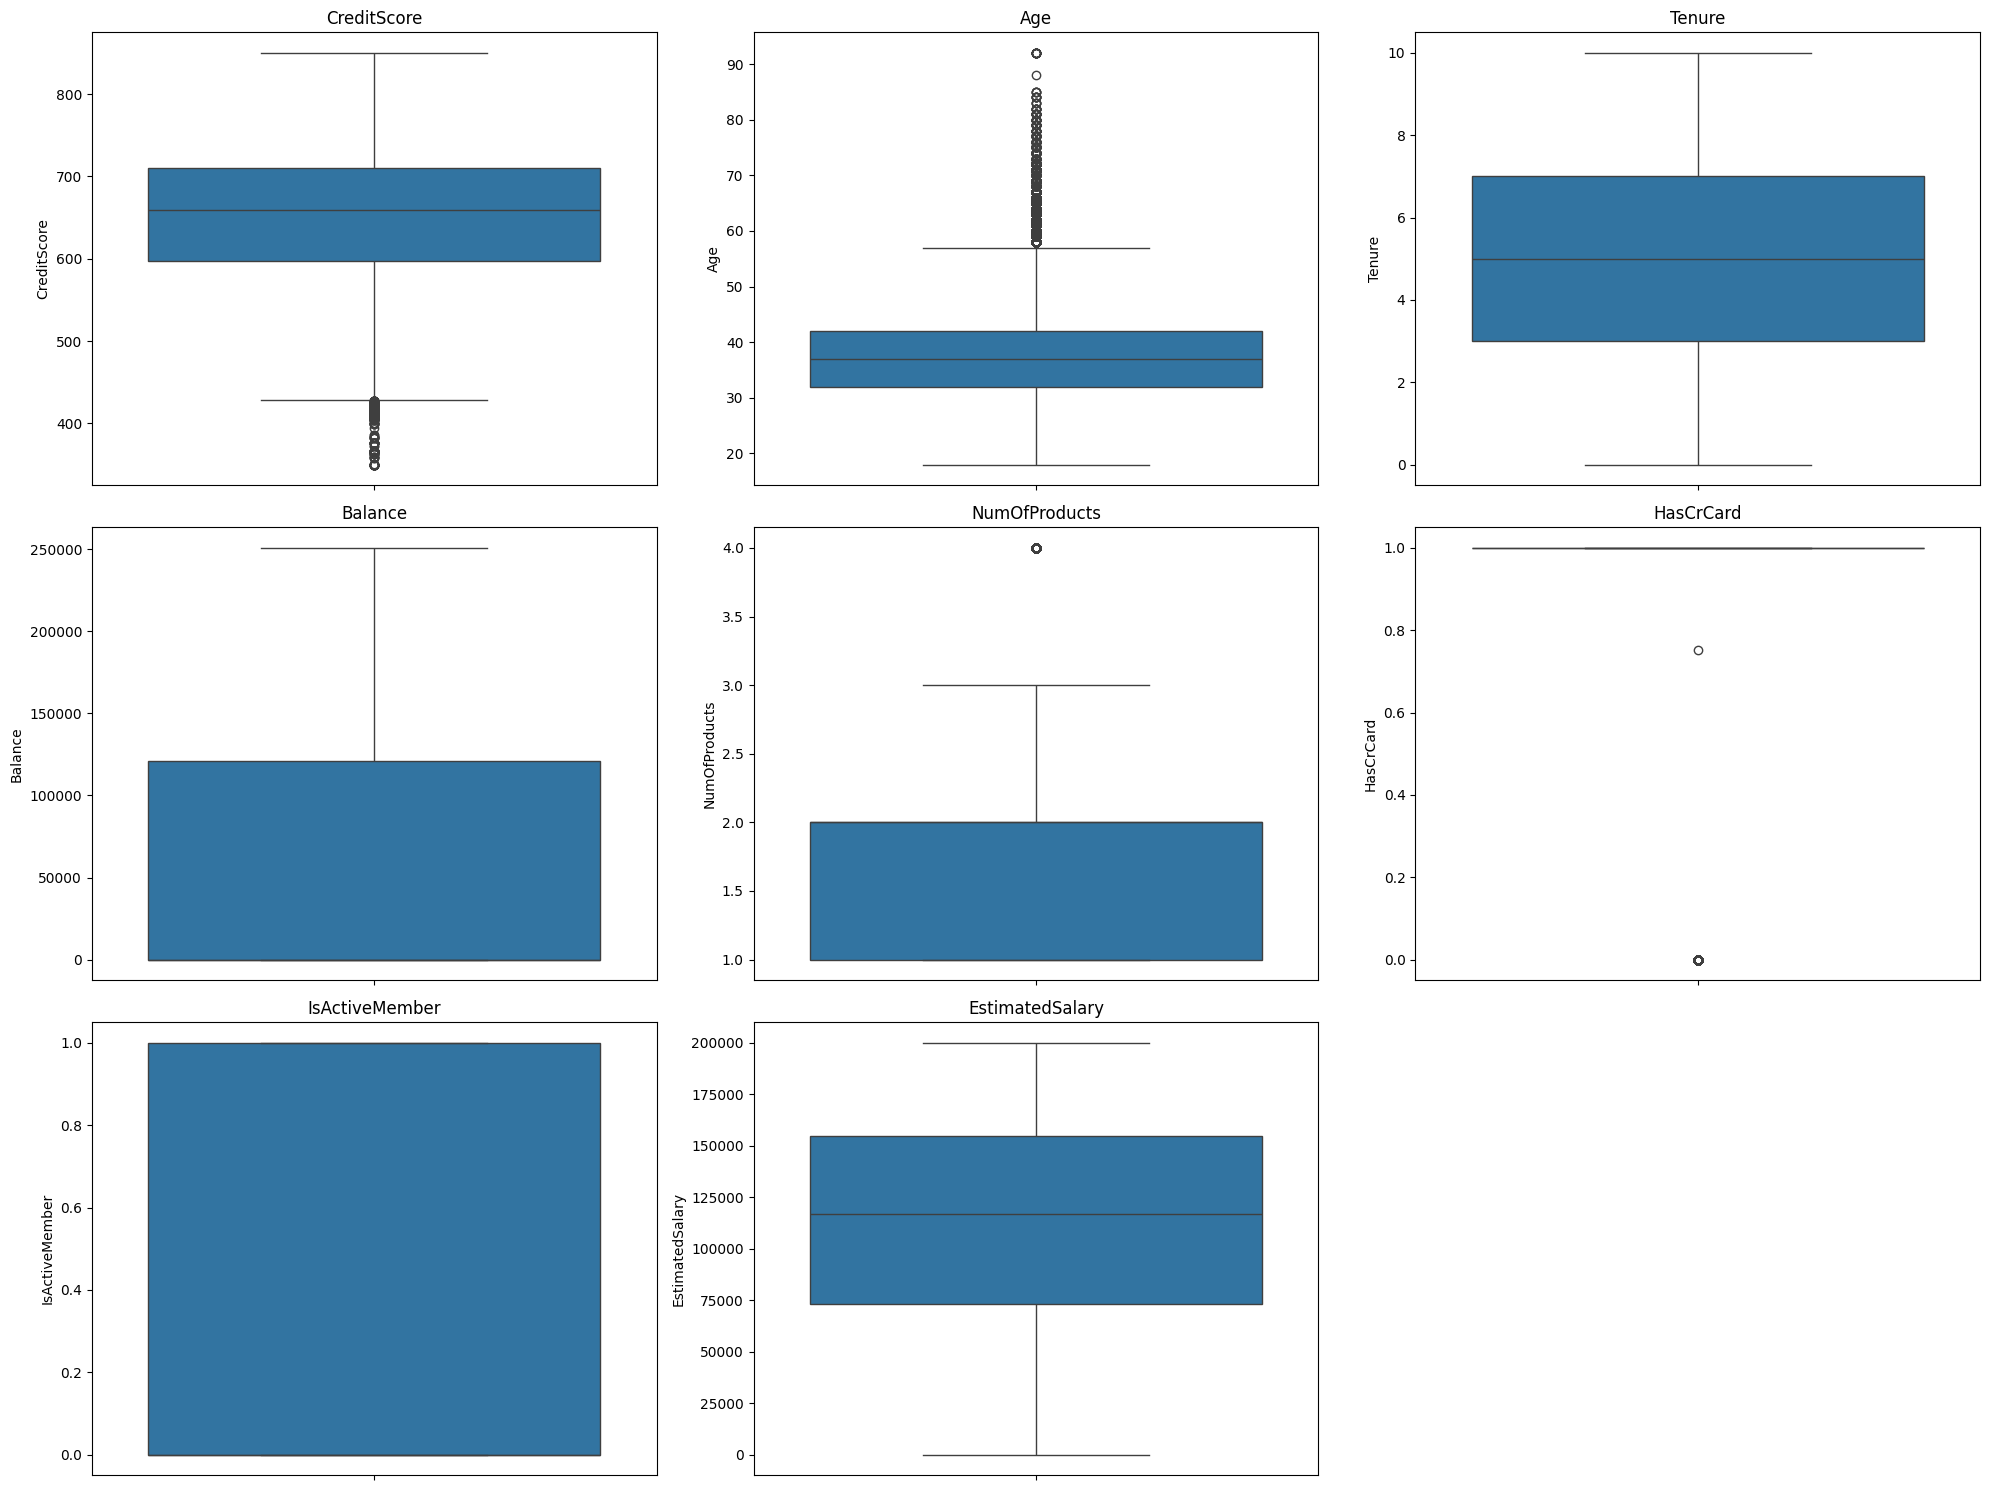

In [64]:
plt.figure(figsize=(20,15))
for i,col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1) # revising : plt.subplot(nrows, ncols, index)
    sns.boxplot(y=BChurn[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### first Some columns clearly show outliers (e.g., Age, CreditScore and NumOfProducts)
##### so we need to handel all the outliers in our dataset

In [65]:
#for the 'Age' column
lower_bound_age = BChurn['Age'].quantile(0.02)
upper_bound_age = BChurn['Age'].quantile(0.99)
BChurn['Age'] = BChurn['Age'].clip(lower_bound_age, upper_bound_age)

#the 'CreditScore' column
lower_bound_credit = BChurn['CreditScore'].quantile(0.01)
upper_bound_credit = BChurn['CreditScore'].quantile(0.98)
BChurn['CreditScore'] = BChurn['CreditScore'].clip(lower_bound_credit, upper_bound_credit)

##the 'NumOfProducts' column
lower_bound_credit = BChurn['NumOfProducts'].quantile(0.01)
upper_bound_credit = BChurn['NumOfProducts'].quantile(0.99)
BChurn['NumOfProducts'] = BChurn['NumOfProducts'].clip(lower_bound_credit, upper_bound_credit)


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Feature Engineering⬇️</p>

**if we loke again into our dataset we can derive a new feature from the age and CreditScore variables: younger individuals may have lower credit scores due to shorter credit history, while older individuals may have higher credit scores.**

In [66]:
 BChurn['Age_CreditScore'] = BChurn['Age'] * BChurn['CreditScore']

**Because the Age column has outliers in height, we can bin it into bins.**

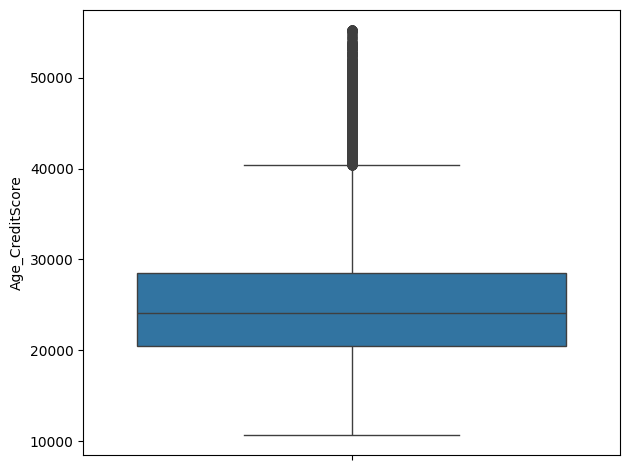

In [67]:
sns.boxplot(y=BChurn['Age_CreditScore'])
plt.tight_layout()
plt.show()

In [68]:
lower_bound_credit = BChurn['Age_CreditScore'].quantile(0.03)
upper_bound_credit = BChurn['Age_CreditScore'].quantile(0.99)
BChurn['Age_CreditScore'] = BChurn['Age_CreditScore'].clip(lower_bound_credit, upper_bound_credit)

In [69]:
#this is a numerical column let's add it into our list
numerical_features.append(BChurn.columns[-1])
numerical_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Age_CreditScore']

In [70]:
BChurn['Age'].min(),BChurn['Age'].max()

(np.float64(23.0), np.float64(66.0))

In [71]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70']
BChurn['AgeGroup'] = pd.cut(BChurn['Age'], bins=bins, labels=labels, right=False)
categorical_features.append('AgeGroup')

**for instance we will keep the two features Age and AgeGroup,and in the feature selection we will decide whether to remove one or keep both.**

In [72]:
categorical_features

['Geography', 'Gender', 'AgeGroup']

In [73]:
#this code for not losing the order when we perform the one hot encoding 
new_column_order = categorical_features + numerical_features + ['Exited']
# Reorder the DataFrame
BChurn = BChurn[new_column_order]

In [74]:
BChurn.head()

,Geography,Gender,AgeGroup,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CreditScore,Exited
0,France,Male,31-40,668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,22044.0,0
1,France,Male,31-40,627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,20691.0,0
2,France,Male,41-50,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,27120.0,0
3,France,Male,31-40,581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,19754.0,0
4,Spain,Male,31-40,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,23628.0,0


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Encode Categorical Variables⬇️</p>

In [75]:
onehot_encoder = OneHotEncoder()

onehot_Transformation = ColumnTransformer(
    transformers=[
        ('onehot',onehot_encoder,categorical_features)
    ],
    remainder='passthrough'
)
#fit the transformer to the data

BChurn_encoded = onehot_Transformation.fit_transform(BChurn)

# Get the column names for the one-hot encoded parts and the remaining columns
columns_transformed = onehot_Transformation.named_transformers_['onehot'].get_feature_names_out(categorical_features)
all_columns = list(columns_transformed) + numerical_features + ['Exited']


BChurn = pd.DataFrame(BChurn_encoded,columns=all_columns)

In [76]:
BChurn.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,AgeGroup_20-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CreditScore,Exited
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,22044.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,20691.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,27120.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,19754.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,23628.0,0.0


In [77]:
all_columns

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'AgeGroup_20-30',
 'AgeGroup_31-40',
 'AgeGroup_41-50',
 'AgeGroup_51-60',
 'AgeGroup_61-70',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Age_CreditScore',
 'Exited']

In [78]:
BChurn.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,AgeGroup_20-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CreditScore,Exited
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,22044.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,20691.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,27120.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,19754.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,23628.0,0.0


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️ Standardization⬇️</p>

In [79]:
numerical_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Age_CreditScore']

In [80]:
scaler = StandardScaler()
BChurn[numerical_features] = scaler.fit_transform(BChurn[numerical_features])

In [81]:
BChurn.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,AgeGroup_20-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CreditScore,Exited
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.148383,-0.589401,-0.718542,-0.899917,0.836011,0.575525,-0.997509,1.369449,-0.471834,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.364230,-0.589401,-1.430003,-0.899917,0.836011,0.575525,1.002503,-1.227141,-0.685392,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.273410,0.211284,1.771572,-0.899917,0.836011,0.575525,-0.997509,1.436687,0.329365,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.939356,-0.475017,-1.074272,1.463963,-1.021844,0.575525,1.002503,-0.537243,-0.833289,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.748514,-0.589401,-0.007081,-0.899917,0.836011,0.575525,1.002503,-1.904786,-0.221814,0.0


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️ Correlation Analysis⬇️</p>

### this step aims to understandir the relationships between different variables in our dataset

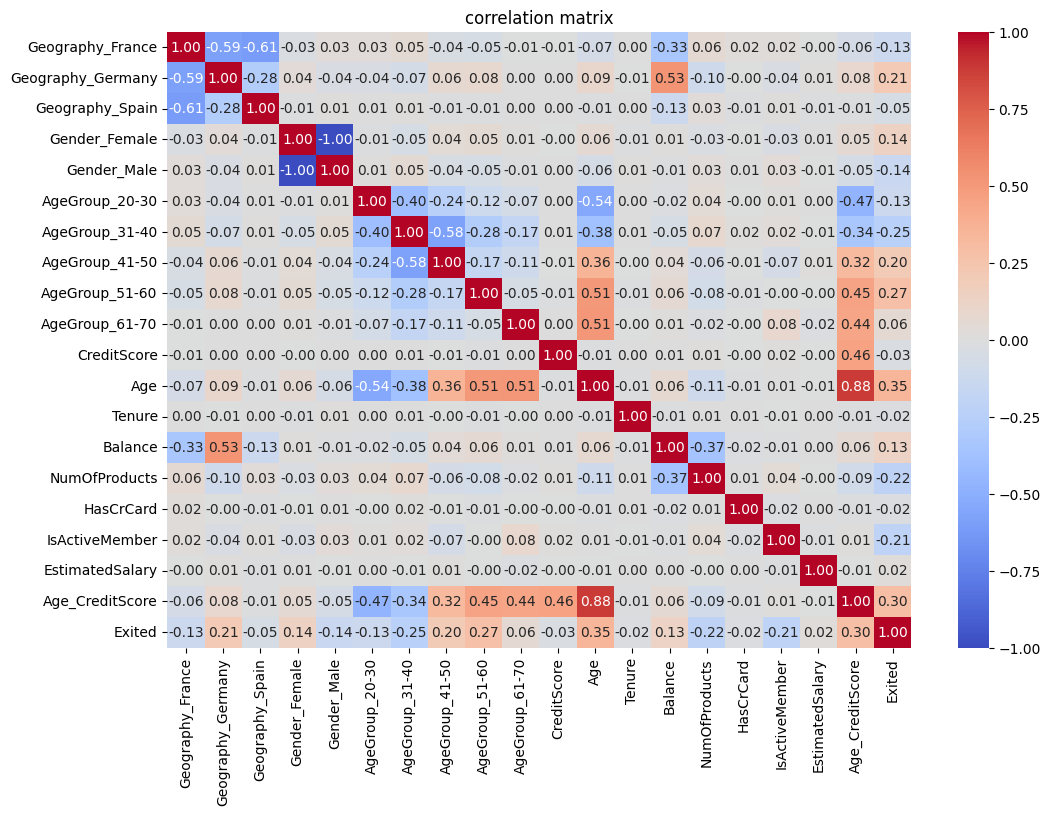

In [82]:
correlation_matrix = BChurn.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [83]:
target_variable = 'Exited'
# 1. Features with high correlation with the target variable

threshold = 0.3 

high_corr_with_target = correlation_matrix[target_variable].sort_values(ascending=False)
strong_positive_corr_with_target = high_corr_with_target[high_corr_with_target > threshold]
strong_negative_corr_with_target = high_corr_with_target[high_corr_with_target < -threshold]

print("Strong Positive Correlations with the Target:\n",strong_positive_corr_with_target)
print("\nStrong Negative Correlations with the Target:\n",strong_negative_corr_with_target)

Strong Positive Correlations with the Target:
 Exited    1.000000
Age       0.345269
Name: Exited, dtype: float64

Strong Negative Correlations with the Target:
 Series([], Name: Exited, dtype: float64)


### **what we concluse :**
- #### the older customers are more likely to churn
- #### customers with higher credit scores are somewhat more likely to churn
- #### AgeGroup (51-60, 61-70, 41-50): these age groups are more likely to churn compared to other age groups. 
- #### AgeGroup (31-40, 20-30):customers in these age groups are less likely to churn. This might indicate that younger to middle-aged customers are more stable or satisfied with the services.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Data Splitting⬇️</p>

In [84]:
X = BChurn.drop('Exited', axis=1)  # Features
y = BChurn['Exited']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Feature Selection⬇️</p>

In [85]:
selector = VarianceThreshold(threshold=(.01))
BChurn_reduced = selector.fit_transform(BChurn)

# Get the selected feature names
features = BChurn.columns[selector.get_support(indices=True)]
BChurn = pd.DataFrame(BChurn_reduced, columns=features)

<p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻Model Selection and Training🔻
</p>


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Selecting Machine Learning Models⬇️</p>

- ### Logistic Regression
- ### Decision Trees
- ### Random Forest
- ### Gradient Boosting Machines (GBM)
- ### Support Vector Machines (SVM)
- ### K-Nearest Neighbors (KNN)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Train the Models on the Training Data⬇️</p>

In [86]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "xgb_clf" : xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name,model in models.items():
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    print(f"Name: {name} Accuracy: {accuracy:.4f}")


Name: Logistic Regression Accuracy: 0.8404
Name: KNN Accuracy: 0.8453
Name: xgb_clf Accuracy: 0.8648


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Hyperparamete⬇️</p>

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna

# Define the objective function for hyperparameter tuning
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2',None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': trial.suggest_categorical('random_state', [42])
    }
    
    # Initialize RandomForestClassifier with current set of parameters
    rf_model = RandomForestClassifier(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='roc_auc')
    return cv_scores.mean()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create an Optuna study object
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective_rf, n_trials=3, timeout=1000)

# Get the best parameters found by Optuna
best_params = study.best_params
print("Best Hyperparameters for Random Forest:", best_params)

# Train the model with the best parameters found
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)


[I 2025-02-11 12:28:47,865] A new study created in memory with name: no-name-769573f6-774a-42f1-9000-6b54622a3cfd
[I 2025-02-11 12:32:50,150] Trial 0 finished with value: 0.8847138897948122 and parameters: {'n_estimators': 609, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'random_state': 42}. Best is trial 0 with value: 0.8847138897948122.
[I 2025-02-11 12:39:05,452] Trial 1 finished with value: 0.8832549673624067 and parameters: {'n_estimators': 715, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 18, 'max_features': 'log2', 'bootstrap': False, 'random_state': 42}. Best is trial 0 with value: 0.8847138897948122.
[I 2025-02-11 12:47:05,876] Trial 2 finished with value: 0.8824871042611969 and parameters: {'n_estimators': 991, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 42}. Best is trial 0 with value: 0.8847138897948122.


Best Hyperparameters for Random Forest: {'n_estimators': 609, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'random_state': 42}


RandomForestClassifier(bootstrap=False, max_depth=13, max_features='log2',
                       min_samples_leaf=4, min_samples_split=14,
                       n_estimators=609, random_state=42)

In [ ]:
predictions_train = best_rf_model.predict(X_train)
predictions_test = best_rf_model.predict(X_test)
accuracy_train = accuracy_score(y_train,predictions_train)
accuracy_test = accuracy_score(y_test,predictions_test)
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

 
 <p style="background-color: #12f7ff; font-family: 'Trebuchet MS', sans-serif; color: #000; font-size: 150%; text-align: center; border-radius: 50px 15px; padding: 10px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);">
    🔻 Preparing Submission🔻
</p>


###  to ensure our test_df is preprocessed in the same way as your training data (BChurn), we need to apply the same steps of preprocessing to it. This includes:
- #### Handle Missing Values
- #### Apply One-Hot Encoding
- #### Scale Numerical Features
- #### Ensure Feature Order is Consistent

In [43]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [44]:
id_colomn = test_df['id']
test_df = test_df.drop(['id','CustomerId','Surname'],axis=1)


In [45]:
# Creating 'Age_CreditScore' feature
test_df['Age_CreditScore'] = test_df['Age'] * test_df['CreditScore']

# Updating the 'numerical_features' list
if 'Age_CreditScore' not in numerical_features:
    numerical_features.append('Age_CreditScore')

# Creating 'AgeGroup' for test_df
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

# Updating the 'categorical_features' list
if 'AgeGroup' not in categorical_features:
    categorical_features.append('AgeGroup')
    
numerical_features = [nf for nf in numerical_features if nf != 'Exited']

# Reorder the DataFrame
new_column_order = categorical_features + numerical_features 
test_df = test_df[new_column_order]



In [46]:
#handle the missing Values

Inf = SimpleImputer(strategy='mean')
Icf = SimpleImputer(strategy='most_frequent')

# Assuming the same columns need imputation in test_df
test_df[numerical_features] = pd.DataFrame(Inf.fit_transform(test_df[numerical_features]))
test_df[categorical_features] = pd.DataFrame(Icf.fit_transform(test_df[categorical_features]))

In [47]:
test_df.head()

,Geography,Gender,AgeGroup,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CreditScore
0,France,Female,20-30,586.0,23.0,2.0,0.00,2.0,0.0,1.0,160976.75,13478.0
1,France,Female,41-50,683.0,46.0,2.0,0.00,1.0,1.0,0.0,72549.27,31418.0
2,France,Female,31-40,656.0,34.0,7.0,0.00,2.0,1.0,0.0,138882.09,22304.0
3,France,Male,31-40,681.0,36.0,8.0,0.00,1.0,1.0,0.0,113931.57,24516.0
4,Germany,Male,31-40,752.0,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00,28576.0


In [48]:
#onehot transformation

# test_df_encoded = onehot_Transformation.transform(test_df)
test_df_encoded = onehot_Transformation.fit_transform(test_df)
all_columns.remove('Exited')
# Reconstruct DataFrame with the same column names
test_df = pd.DataFrame(test_df_encoded, columns=all_columns)

In [49]:
#scaling numerical features
scaler = StandardScaler()
test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])

In [50]:
test_df.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,AgeGroup_20-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CreditScore
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.878176,-1.706504,-1.067887,-0.881274,0.820030,-1.746219,1.009580,0.967874,-1.752408
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.329567,0.888990,-1.067887,-0.881274,-1.015806,0.572666,-0.990511,-0.790939,0.971286
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.006609,-0.465181,0.713922,-0.881274,0.820030,0.572666,-0.990511,0.528413,-0.412423
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.304665,-0.239486,1.070284,-0.881274,-1.015806,0.572666,-0.990511,0.032150,-0.076592
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.188684,-0.013791,1.783008,1.050038,-1.015806,0.572666,-0.990511,0.539331,0.539807


 ### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Final Prediction⬇️</p>

In [51]:
#Now we can use best_xgb_model to make predictions
test_probabilities = best_rf_model.predict_proba(test_df)[:, 1]

# Prepare the submission file
submission = pd.DataFrame({
    'id': list(id_colomn),
    'Exited': test_probabilities
})
submission.to_csv('submission.csv', index=False)